In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
def sigma_1(gd, a):
    
    

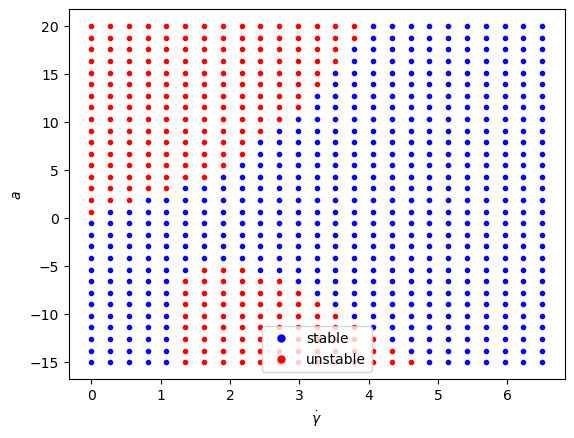

In [19]:
ev = np.loadtxt("data/ev-data-1", delimiter=',')
gd = np.loadtxt("data/gdv-1", delimiter=',')
a = np.loadtxt("data/av-1", delimiter=',')
n,m = len(gd), len(gd[0])

for i in range(n):
    for j in range(m):
        c = "red" if ev[i][j] > 0 else "blue"
        plt.plot(gd[i][j],a[i][j],".",color=c, picker=True)
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable')
plt.legend(handles=[blue_dot, red_dot])
# plt.title("Stability Plot in the $\dot\gamma$-$a$ plane, $k$={}".format(_k))
plt.show()

In [5]:
gd

array([[0.        , 0.27083333, 0.54166667, 0.8125    , 1.08333333,
        1.35416667, 1.625     , 1.89583333, 2.16666667, 2.4375    ,
        2.70833333, 2.97916667, 3.25      , 3.52083333, 3.79166667,
        4.0625    , 4.33333333, 4.60416667, 4.875     , 5.14583333,
        5.41666667, 5.6875    , 5.95833333, 6.22916667, 6.5       ],
       [0.        , 0.27083333, 0.54166667, 0.8125    , 1.08333333,
        1.35416667, 1.625     , 1.89583333, 2.16666667, 2.4375    ,
        2.70833333, 2.97916667, 3.25      , 3.52083333, 3.79166667,
        4.0625    , 4.33333333, 4.60416667, 4.875     , 5.14583333,
        5.41666667, 5.6875    , 5.95833333, 6.22916667, 6.5       ],
       [0.        , 0.27083333, 0.54166667, 0.8125    , 1.08333333,
        1.35416667, 1.625     , 1.89583333, 2.16666667, 2.4375    ,
        2.70833333, 2.97916667, 3.25      , 3.52083333, 3.79166667,
        4.0625    , 4.33333333, 4.60416667, 4.875     , 5.14583333,
        5.41666667, 5.6875    , 5.95833333, 6.